In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('data\\train.csv')
test = pd.read_csv('data\\test.csv')
train = train.drop('Loan_ID', axis=1)
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [3]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


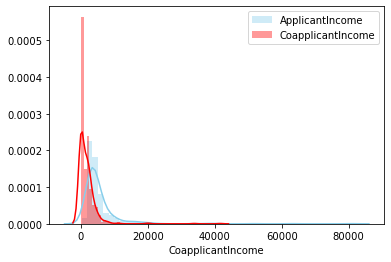

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(train["ApplicantIncome"], color="skyblue", label="ApplicantIncome")
sns.distplot(train["CoapplicantIncome"], color="red", label="CoapplicantIncome")
#sns.distplot(train["Loan_Amount_Term"], color="blue", label="Loan_Amount_Term")
#sns.distplot(train["LoanAmount"], color="pink", label="LoanAmount")
plt.legend()

<Figure size 432x288 with 0 Axes>

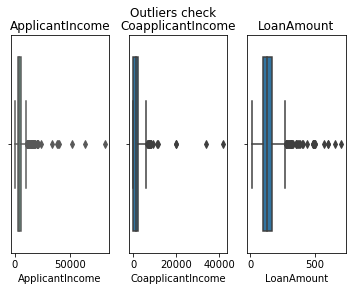

In [5]:
sns.despine(left=True)
fig, axes = plt.subplots(1,3)
plt.suptitle("Outliers check")
axes[0].set_title("ApplicantIncome")
axes[1].set_title("CoapplicantIncome")
axes[2].set_title("LoanAmount")
axes[0] = sns.boxplot(train['ApplicantIncome'], ax=axes[0],palette="Set2")
axes[1] = sns.boxplot(train['CoapplicantIncome'], ax=axes[1])
axes[2] = sns.boxplot(train['LoanAmount'], ax=axes[2])
plt.show()

In [6]:
train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [7]:
train['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [8]:
train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

<Figure size 432x288 with 0 Axes>

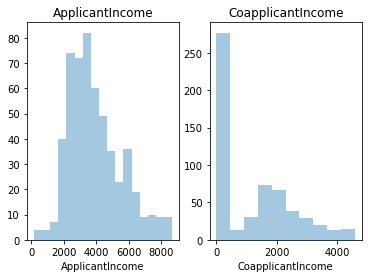

In [9]:
sns.despine(left=True)
fig, axes = plt.subplots(1,2)
#plt.suptitle("Outliers check")
axes[0].set_title("ApplicantIncome")
axes[1].set_title("CoapplicantIncome")

axes[0] = sns.distplot(train['ApplicantIncome'][train.ApplicantIncome<8712.5], ax=axes[0], kde=False)
axes[1] = sns.distplot(train['CoapplicantIncome'][train.CoapplicantIncome<4594.5], ax=axes[1], kde=False)

#axes[1] = sns.boxplot(train['CoapplicantIncome'], ax=axes[0])
plt.show()

<Figure size 432x288 with 0 Axes>

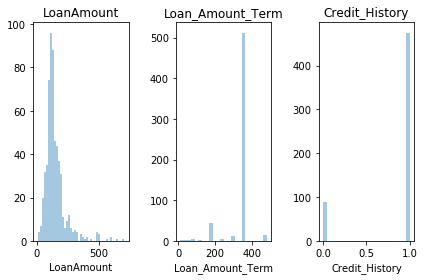

In [10]:
sns.despine(left=True)
fig, axes = plt.subplots(1,3)
axes[0].set_title("LoanAmount")
axes[1].set_title("Loan_Amount_Term")
axes[2].set_title("Credit_History")
axes[0] = sns.distplot(train['LoanAmount'], ax=axes[0], kde=False)
axes[1] = sns.distplot(train['Loan_Amount_Term'], ax=axes[1], kde=False)
axes[2] = sns.distplot(train['Credit_History'], ax=axes[2], kde=False)
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

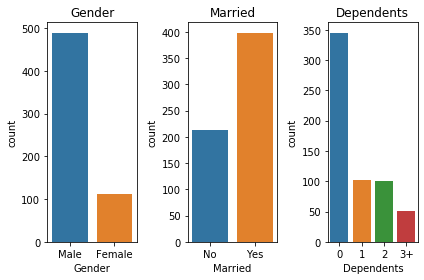

In [11]:
sns.despine(left=True)
fig, axes = plt.subplots(1,3)
axes[0].set_title("Gender")
axes[1].set_title("Married")
axes[2].set_title("Dependents")
axes[0] = sns.countplot(train['Gender'], ax=axes[0])
axes[1] = sns.countplot(train['Married'], ax=axes[1])
axes[2] = sns.countplot(train['Dependents'], ax=axes[2])
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

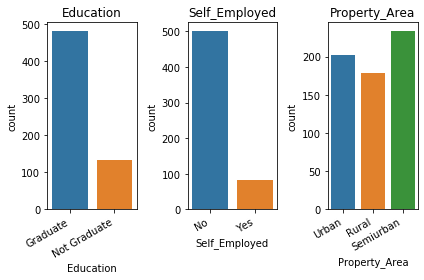

In [12]:
sns.despine(left=True)
plt.figure(figsize=(8,4))
fig, axes = plt.subplots(1,3)
axes[0].set_title("Education")
axes[1].set_title("Self_Employed")
axes[2].set_title("Property_Area")
axes[0] = sns.countplot(train['Education'], ax=axes[0])
axes[1] = sns.countplot(train['Self_Employed'], ax=axes[1])
axes[2] = sns.countplot(train['Property_Area'], ax=axes[2])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha="right")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, ha="right")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=30, ha="right")
plt.tight_layout()

In [13]:
train = train[(train.ApplicantIncome<8712.5) & (train.CoapplicantIncome<4594.5)]
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [16]:
numeric_features = train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train.select_dtypes(include=['object']).drop(['Loan_Status'], axis=1).columns

from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

In [19]:
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))
    print()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
model score: 0.824

SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
model score: 0.725

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=True, random_state=None, shrinking=True,
      tol=0.001, verbose=False)
model score: 0.853

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
               

In [20]:
X_train.shape

(408, 11)

In [ ]:
param_grid = { 
    'classifier__n_estimators': [200, 500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [4,5,6,7,8],
    'classifier__criterion' :['gini', 'entropy']}
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(rf, param_grid, n_jobs= 1)
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

In [22]:
print(CV.best_estimator_[1])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [23]:
X_train.shape

(408, 11)

In [24]:
y_test

320    Y
142    Y
331    Y
281    Y
360    N
      ..
469    N
576    N
381    Y
563    Y
459    N
Name: Loan_Status, Length: 102, dtype: object

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(
                       bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False))])
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
#mean_squared_error(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.8529411764705882

In [70]:
rf[1].feature_importances_

array([6.18075444e-02, 1.11663783e-01, 7.59443016e-02, 5.66626279e-02,
       3.70300033e-01, 1.61592148e-02, 2.99552251e-02, 1.57273294e-02,
       1.60552602e-02, 2.39405585e-02, 2.41838712e-04, 7.54420835e-03,
       2.28593646e-03, 1.19024500e-02, 9.35578497e-03, 7.91578287e-03,
       1.77934333e-02, 2.58234323e-02, 1.35796082e-02, 4.84661948e-03,
       1.48499684e-03, 3.34810586e-02, 5.85053184e-02, 2.70236530e-02])

In [71]:
X_train.shape

(408, 11)

In [72]:
rf[1].classes_

array(['N', 'Y'], dtype=object)

In [73]:
rf.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names(categorical_features)

array(['Gender_Female', 'Gender_Male', 'Gender_missing', 'Married_No',
       'Married_Yes', 'Married_missing', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Dependents_missing',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Self_Employed_missing',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'], dtype=object)

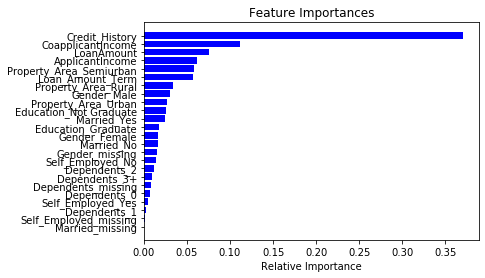

In [74]:
import numpy as np
#num_features = np.array(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"])
cat_features = rf.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names(categorical_features)
features = np.concatenate((numeric_features, cat_features), axis=0)
importances = rf[1].feature_importances_
indices = np.argsort(importances)
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [75]:
features

array(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female',
       'Gender_Male', 'Gender_missing', 'Married_No', 'Married_Yes',
       'Married_missing', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Dependents_missing', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Self_Employed_missing', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'], dtype=object)

In [76]:
estimator = rf[1].estimators_[1]
from sklearn.tree import export_graphviz

# Export as dot file
export_graphviz(estimator, 
                out_file='tree2.dot', 
                feature_names = features,
                class_names = rf[1].classes_,
                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [80]:
# Convert to png
# from subprocess import call
# #call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# call(['dot', '-Tpdf', 'tree.dot', '-o', 'C:\Users\LXie\Desktop\my_github\MachineLearning\LoanPrediction', '-Gdpi=600'])
# dot -Tpdf tree2.dot -o tree4.pdf -Gdpi=600 # use this command in cmd win10 to convert dot to pdf
# dot -Tpng tree2.dot -o tree5.png -Gdpi=600 # use this command in cmd win10 to convert dot to png

In [81]:
# Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

In [ ]:
rf.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names(numerical_features)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
sklearn.__version__

In [ ]:
import sklearn

In [ ]:
sklearn.__version__

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:

ax = sns.heatmap(matrix,annot=True,cbar=True,center=100.0)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title("Confusion Matrix")
